<a href="https://colab.research.google.com/github/digitalmark0719/DataScience-Profile/blob/master/Tensorflow_mnist_fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4423680/4422102 [==============================] - 0s 0us/step


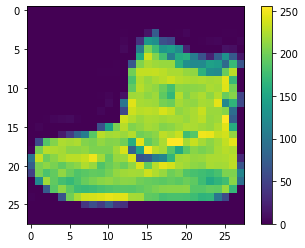

In [ ]:
import tensorflow as tf 
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
(train_x,train_y),(test_x,test_y) = keras.datasets.fashion_mnist.load_data()
plt.figure()
plt.imshow(train_x[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [ ]:

val_x = train_x[:50000]
val_y = train_y[:50000]
train_x = train_x[50000:]
train_y = train_y[50000:]

In [ ]:
model = tf.keras.models.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(128,activation='relu'),
                             tf.keras.layers.Dense(128,activation='relu'),
                             tf.keras.layers.Dense(10)
])
model.compile(metrics=['accuracy'],loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer='Adam')
hist = model.fit(train_x,train_y,epochs=5,validation_data=(val_x,val_y))

Epoch 1/5
313/313 [==============================] - 3s 9ms/step - loss: 8.5312 - accuracy: 0.6661 - val_loss: 2.1643 - val_accuracy: 0.7180
Epoch 2/5
313/313 [==============================] - 3s 8ms/step - loss: 1.5774 - accuracy: 0.7179 - val_loss: 1.3744 - val_accuracy: 0.7171
Epoch 3/5
313/313 [==============================] - 3s 8ms/step - loss: 1.0648 - accuracy: 0.7411 - val_loss: 0.9510 - val_accuracy: 0.7415
Epoch 4/5
313/313 [==============================] - 3s 8ms/step - loss: 0.8261 - accuracy: 0.7618 - val_loss: 0.8356 - val_accuracy: 0.7766
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 0.7195 - accuracy: 0.7804 - val_loss: 0.9683 - val_accuracy: 0.7477


In [ ]:
predict_proba = tf.keras.models.Sequential([model,tf.keras.layers.Softmax()])
prediction = predict_proba.predict(train_x)
print(train_y[:5])
print(np.argmax(prediction,axis=1)[:5])


[9 2 1 0 2]
[9 2 1 0 0]


Text(0.5, 0, 'Drawing of the training and validation loss')

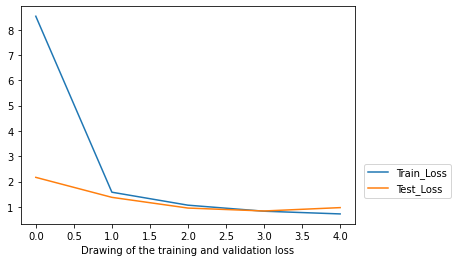

In [ ]:
plt.plot(hist.history['loss'],label='Train_Loss')
plt.plot(hist.history['val_loss'],label='Test_Loss')
plt.legend(bbox_to_anchor=[1.3,.3])
plt.xlabel('Drawing of the training and validation loss')


<Figure size 432x288 with 0 Axes>

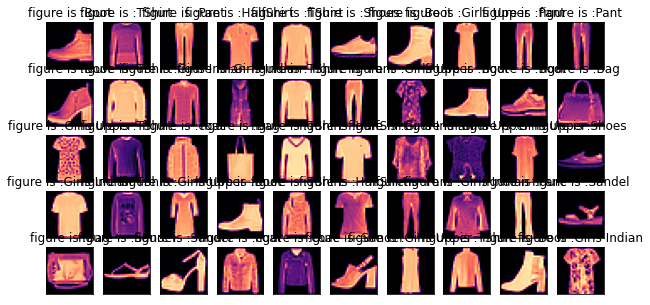

In [ ]:
articles ={1:'Pant',2:'TShirt',3:'Girls Upper',4:'coat',6:'Girls Indian',7:'Shoes',8:'Bag',9:'Boot',0:'HalfShirt',5:'Sandel'}
plt.clf()
fig=plt.figure(figsize=(10,5))
for i in np.arange(50):
  plt.subplot(5,10,i+1)
  plt.imshow(X=train_x[i,:],cmap=plt.cm.magma)
  plt.title(f'figure is :{articles[train_y[i]]}')
  plt.xticks([])
  plt.yticks([])
  #plt.colorbar(cmap=plt.cm.gray_r())
  #plt.grid(False)
